---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

As mentioned in the lecture we saw the equations
$$\begin{align*}
k_t &= (1-\delta) k_{t-1} + i_{t-1}, \\
y_t &= k_t^\alpha n_t^{1-\alpha} = c_t + i_t, \\
n_{t+1} &= g n_t.
\end{align*}$$
And so we obtain the following detrended equations characterising the Solow model:
$$\begin{cases}
\hat{k_t} &= \frac{(1-\delta) k_{t-1} + i_{t-1}}{g}, \\
\hat{y_t} &= \left(\frac{k_t}{n_t}\right)^\alpha = \hat{k}_t^\alpha, \\
\hat{y}_{t} &= \hat{c}_{t} + \hat{i}_{t}.
\end{cases}$$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [1]:
# Create a special structure # But this definition is immutable, you'd have to restart the kernel to make changes
struct Parameters
α
β
δ
g
end

In [2]:
pvalues = Parameters(0.3, 0.96, 0.1, 0.01)

Parameters(0.3, 0.96, 0.1, 0.01)

In [3]:
typeof(pvalues)

Parameters

In [4]:
# Use a dictionary
pdict = Dict(
    :α => 0.3,
    :β => 0.96,
    :δ => 0.1,
    :g => 0.01
)

Dict{Symbol, Float64} with 4 entries:
  :α => 0.3
  :δ => 0.1
  :g => 0.01
  :β => 0.96

In [5]:
pdict[:α]

0.3

In [6]:
# Use a vector
pvector = [0.3, 0.96, 0.1, 0.01]
# but using a vector is very error prone

4-element Vector{Float64}:
 0.3
 0.96
 0.1
 0.01

In [7]:
# Named tuple
p = (; α = 0.3, β = 0.96, δ = 0.1, g = 1.01, s = 0.2)

(α = 0.3, β = 0.96, δ = 0.1, g = 1.01, s = 0.2)

In [8]:
p[1], p[:α], p.α

(0.3, 0.3, 0.3)

In [9]:
typeof(p)

NamedTuple{(:α, :β, :δ, :g, :s), NTuple{5, Float64}}

In [10]:
function f(k0, p)
    y0 = k0^(p.α)
    i0 = p.s * y0

    k1 = (k0*(1-p.δ) + i0) / (p.g)
    return k1
end

f (generic function with 1 method)

In [11]:
p = (; α = 0.3, β = 0.96, δ = 0.1, g = 1.01, s = 0.2)
f(10.0, p)

9.3059925376176

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [12]:
function recursive_steps(fun, x0, args...; N = 100)
    values = Float64[x0]
    for n in 1:N
        x0 = values[end]
        x1 = fun(x0, args...)
        push!(values, x1)
    end
    return values
end

recursive_steps (generic function with 1 method)

In [13]:
methods(f)

# 1 method for generic function "f":
[1] f(k0, p) in Main at /Users/maxime/Desktop/MIT/2_solow.ipynb:1

In [14]:
recursive_steps(u->f(u, p), 0.5) # Transforming f into a one argument function

101-element Vector{Float64}:
 0.5
 0.6063866131398485
 0.7107695855269803
 0.812101308038866
 0.9096883570997635
 1.0030893113343788
 1.0920450879310866
 1.176429808153857
 1.2562152493282885
 1.3314446313777966
 ⋮
 2.3476131685985817
 2.347730195704665
 2.3478383026256426
 2.3479381691683163
 2.348030423348851
 2.348115645335857
 2.3481943710936406
 2.348267095748365
 2.348334276698156

In [15]:
import Pkg; Pkg.add("SimplePlots")
using SimplePlots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [16]:
sim = recursive_steps(u->f(u, p), 0.5)

101-element Vector{Float64}:
 0.5
 0.6063866131398485
 0.7107695855269803
 0.812101308038866
 0.9096883570997635
 1.0030893113343788
 1.0920450879310866
 1.176429808153857
 1.2562152493282885
 1.3314446313777966
 ⋮
 2.3476131685985817
 2.347730195704665
 2.3478383026256426
 2.3479381691683163
 2.348030423348851
 2.348115645335857
 2.3481943710936406
 2.348267095748365
 2.348334276698156

In [17]:
plot(sim)

        ┌──────────────────────────────────────────────────────────────┐ 
   2.35 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⡤⠤⠤⠤⠒⠒⠒⠒⠊⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉│ 
        │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⠤⠒⠊⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠤⠒⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⠔⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⠀⢀⠎⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⠀⡠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⠀⣠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⠀⢰⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⢀⠎⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
        │⠀⠀⡎⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

__What factors affect the steady-state level of capital?__

$$K(1-\frac{1-\delta}{g}) = \frac{I}{g} \implies I = (g-1-\delta) K = s y = s K^\alpha, \, g(x) = 1 + x \%.$$
$$K = \left( \frac{s}{\delta  + g - 1} \right)^{\frac{1}{1-\alpha}}$$
So depends on $s, \delta, g, \alpha$.

$g$ reduces capital. $s$ increases capital. $\alpha$ increase $\implies$ K increases.


Some factors affecting the steady-state level of capital may include
- Levels of human capital of labour included in the capital production process.
- The average household saving rate.
- The growth rate $g$.

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [18]:
function steady_state(p)
    fun = u->f(u, p)
    sim = recursive_steps(fun, 1.0)
    return sim[end]
end

steady_state (generic function with 1 method)

In [19]:
steady_state(p)

2.348599266557238

In [25]:
merge(p, (;β=0.9))

(α = 0.3, β = 0.9, δ = 0.1, g = 1.01, s = 0.2)

In [28]:
β_vec = [steady_state(merge(p, (;β=v))) for v in 0.8:0.001:0.9]
α_vec = [steady_state(merge(p, (;α=v))) for v in 0.2:0.001:0.4]
s_vec = [steady_state(merge(p, (;s=v))) for v in 0.0:0.001:0.4]
δ_vec = [steady_state(merge(p, (;δ=v))) for v in 0.05:0.001:0.2]

151-element Vector{Float64}:
 5.503725376988904
 5.381286855881085
 5.263147232158124
 5.149111777918051
 5.03899611396989
 4.932625596810275
 4.829834744893011
 4.730466701516534
 4.6343727318449774
 4.5414117517556045
 ⋮
 0.9858857982748028
 0.9789551585180868
 0.9721069392972819
 0.9653397636265252
 0.9586522840880827
 0.9520431820580434
 0.9455111669559115
 0.9390549755172075
 0.932673371088312

In [34]:
#import Plots #error....

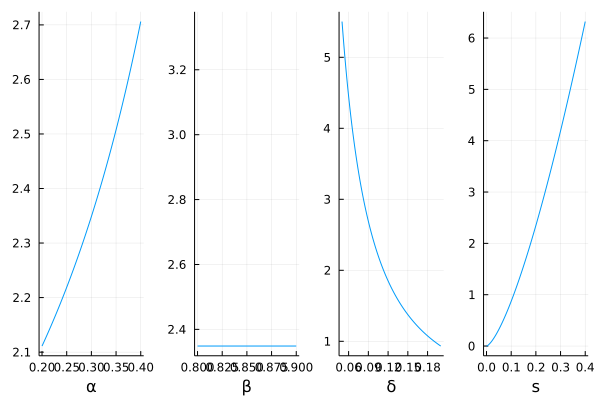

In [47]:
plt1 = Plots.plot(0.2:0.001:0.4, α_vec;legend=false, xlabel = "α")
plt2 = Plots.plot(0.8:0.001:0.9, β_vec;legend=false, xlabel = "β")
plt3 = Plots.plot(0.05:0.001:0.2, δ_vec;legend=false, xlabel = "δ")
plt4 = Plots.plot(0.0:0.001:0.4, s_vec;legend=false, xlabel = "s")
Plots.plot(plt1, plt2, plt3, plt4; layout = (1,4))

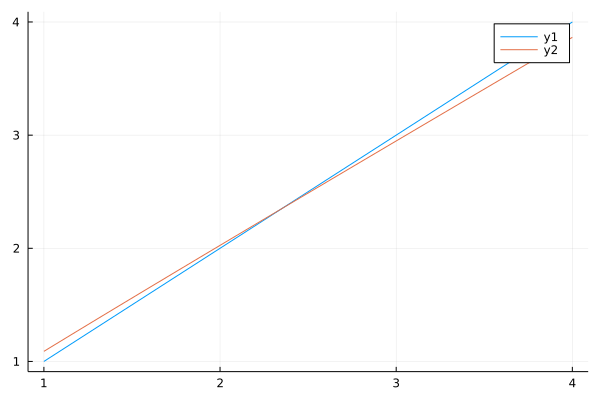

In [53]:
kvec = range(1, 4; length = 100);
fvec = [f(k, p) for k in kvec];
pl = Plots.plot()
Plots.plot!(pl, kvec, kvec)
Plots.plot!(pl, kvec, fvec)

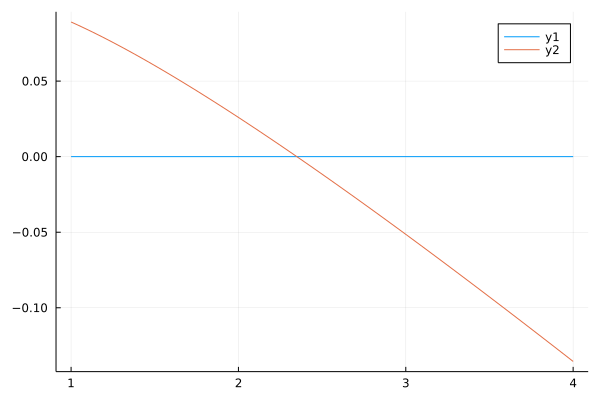

In [56]:
pl = Plots.plot(kvec, kvec .*0)
Plots.plot!(pl, kvec, fvec-kvec)

In [64]:
# To compute derivatives

function df(k0, p)
    d_k0 = 1
    d_y0 = p.α*k0^(p.α-1)
    d_i0 = p.s*d_y0
    d_k1 = (d_k0*(1-p.δ)+d_i0)/(p.g)
    return d_k1
end

df (generic function with 1 method)

In [65]:
kbar = steady_state(p)

2.348599266557238

In [66]:
df(kbar, p)

0.923767723171523

In [69]:
import Pkg; Pkg.add("ForwardDiff")
using ForwardDiff

   Resolving package versions...
   Installed OpenSpecFun_jll ────── v0.5.5+0
   Installed DiffRules ──────────── v1.11.0
   Installed DiffResults ────────── v1.0.3
   Installed CommonSubexpressions ─ v0.3.0
   Installed SpecialFunctions ───── v2.1.4
   Installed ForwardDiff ────────── v0.10.27
    Updating `~/.julia/environments/v1.7/Project.toml`
  [f6369f11] + ForwardDiff v0.10.27
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.0.3
  [b552c78f] + DiffRules v1.11.0
  [f6369f11] + ForwardDiff v0.10.27
  [276daf66] + SpecialFunctions v2.1.4
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0
  [05823500] + OpenLibm_jll
Precompiling project...
  ✓ OpenLibm_jll
  ✓ CommonSubexpressions
  ✓ OpenSpecFun_jll
  ✓ DiffResults
  ✓ SpecialFunctions
  ✓ DiffRules
  ✓ ForwardDiff
  7 dependencies successfully precompiled in 8 seconds (139 already precompiled)


In [70]:
ForwardDiff.derivative(u->f(u, p), kbar)

0.923767723171523

__Compute the steady-state directly using a Newton method and compare convergence speed.__


In [72]:
import Pkg; Pkg.add("Roots")
using Roots

   Resolving package versions...
   Installed CommonSolve ────── v0.2.0
   Installed ConstructionBase ─ v1.3.0
   Installed Setfield ───────── v0.8.2
   Installed Roots ──────────── v2.0.0
    Updating `~/.julia/environments/v1.7/Project.toml`
  [f2b01f46] + Roots v2.0.0
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [38540f10] + CommonSolve v0.2.0
  [187b0558] + ConstructionBase v1.3.0
  [f2b01f46] + Roots v2.0.0
  [efcf1570] + Setfield v0.8.2
  [9fa8497b] + Future
Precompiling project...
  ✓ CommonSolve
  ✓ ConstructionBase
  ✓ Setfield
  ✓ Roots
  4 dependencies successfully precompiled in 4 seconds (146 already precompiled)


In [87]:
find_zero(u->f(u,p)-u, 1.0)

2.3491483500137638

In [86]:
find_zeros(u->f(u,p)-u, 0, 5)

2-element Vector{Float64}:
 0.0
 2.3491483500137633

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

In [90]:
function longterm_consumption(s)
    p1 = merge(p, (;s=s))
    kbar = steady_state(p1)
    ybar = kbar^p1.α
    cbar = ybar * (1-s)
end

longterm_consumption (generic function with 1 method)

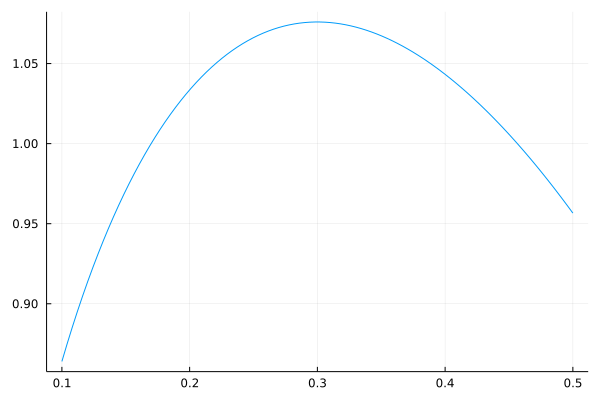

In [96]:
saving_rate = range(0.1, 0.5; length = 100)
consumption = [longterm_consumption(s) for s in saving_rate];
Plots.plot(saving_rate, consumption; legend = false)

In [98]:
import Pkg; Pkg.add("Optim")
using Optim

   Resolving package versions...
   Installed IfElse ───────────────── v0.1.1
   Installed NaNMath ──────────────── v0.3.7
   Installed StatsAPI ─────────────── v1.3.0
   Installed FiniteDiff ───────────── v2.11.0
   Installed NLSolversBase ────────── v7.8.2
   Installed Static ───────────────── v0.6.3
   Installed Preferences ──────────── v1.3.0
   Installed StaticArrays ─────────── v1.4.4
   Installed PositiveFactorizations ─ v0.2.4
   Installed UnPack ───────────────── v1.0.2
   Installed Compat ───────────────── v3.43.0
   Installed LogExpFunctions ──────── v0.3.14
   Installed Parsers ──────────────── v2.3.1
   Installed ArrayInterface ───────── v5.0.7
   Installed LineSearches ─────────── v7.1.1
   Installed Latexify ─────────────── v0.15.15
   Installed DataAPI ──────────────── v1.10.0
   Installed StructArrays ─────────── v0.6.6
   Installed Parameters ───────────── v0.12.3
   Installed FillArrays ───────────── v0.13.2
   Installed Optim ────────────────── v1.6.2
    Updating `

In [100]:
i = argmax(consumption)
println("Optimal saving rate is : $(saving_rate[i]). Corresponding consumption is $(consumption[i]).")

Optimal saving rate is : 0.29797979797979796. Corresponding consumption is 1.0759443478024382.


In [103]:
# saving_rate = range(0.1, 0.5; length = 100)
# consumption = [longterm_consumption(s) for s in saving_rate];
# i = argmax(consumption)
# cbar = consumption[i]
# sbar = saving_rate[i]
# Plots.plot(saving_rate, consumption; legend = false)
# #Plots.plot!(sbar, cbar)

The steady-state consumption maximisation problem depends on the saving rate $s = \frac{i_t}{y_t}$. So we can iterate across a time variable $t$ to find the $s_t$ that maximises steady-state consumption.

In [21]:
# Minimisation problem code block

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__

